# 아이효 스터디 21.03.13
## 작성자: 양창원
### 주제: Precision@k, Recall@k
### 관련 노드: E17, E2

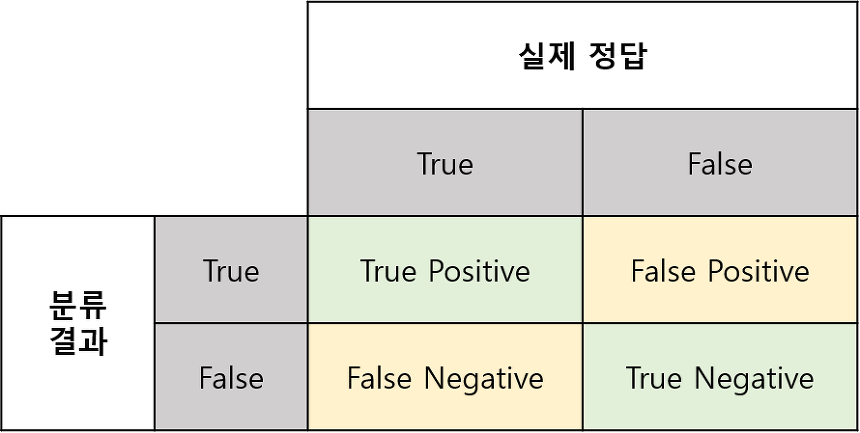

## 1. Precision
- 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율  
- 정답률이라고 부르기도 한다. 날씨 예측 모델이 `맑음`으로 예측했는데, 실제 날씨가 맑았는지 살펴보는 지표.  
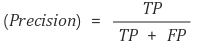

## 2. Recall
- 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율  
- 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표 
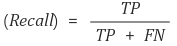

## 3. precision, recall 비교
1. precision과 recall은 모두 실제 True인 정답을 모델이 True라고 예측한 경우에 관심이 있으나, 바라보고자 하는 관점만 다르다.  
2. precision은 모델의 입장, recall은 실제 정답의 입장에서 **정답을 정답이라고 맞춘 경우**를 바라보고 있다.  
3. 다음 경우를 생각해보자. '확실히 맑은 날을 예측할 수 있다면 해당 날에만 맑은 날이라고 예측하자' 라고 한다면, **FP(=실제는 맑지 않은데 맑다고 예측하는 경우)**를 줄여 precision을 끌어올릴 수 있다. 30일 중 실제 맑은 날이 20일이라고 한다면 모델이 2일은 확실히 맑다 라고 예측한다면 FP가 0이므로 precision은 100%가 된다.  
4. 실제로 맑은 20일 중 맑지 않다고 예측(FN)을 고려해(recall) 모델을 평가해야 한다.  
5. 즉, 모델을 평가할 때 데이터의 성격에 따라 precision, recall에 좀 더 비중을 둬야겠지만 두 지표 모두 고려하는 것이 올바르다.  

### @k 는 무슨 의미?
- 추천 시스템에서 모델이 출력하는 추천의 개수에 따라 precision, recall을 측정한다.  
- k값에 따라 두 지표의 크기가 달라진다.  
1. precision@k: k개 추천 중 실제로 사용자가 선호하는 아이템이 얼마나 존재하는 지를 측정하는 지표  
2. recall@k: 전체 선호 아이템 중 추천된 아이템이 속한 비율  

### 예시를 통해 이해해보자
내가 선호하는 영화 = 나이트메어, 13일의 금요일, 오멘, 엑소시스트, 컨저링, 인시디어스, 주온, 링, 장화홍련, 기담  
A 추천 모델의 추천 영화@4 = 나이트메어, 13일의 금요일, 러브 액츄얼리, 어바웃 타임  
B 추천 모델의 추천 영화@4 = 나이트메어, 맘마미아, 원스, 라라랜드  
A 추천 모델의 추천 영화@5 = 나이트메어, 13일의 금요일, 러브 액츄얼리, 어바웃 타임, 오멘  

**여기서 잠깐!**  

**Precision** = TP(True Positive) / TP + **FP(False Positive)**  
**recall** = TP(True Positive) / TP + **FN(False Negative)**  

FP = 내가 싫어하는 영화인데 모델은 자꾸 좋아할거라고 추천하는 모양새, 높을수록 Precision이 떨어진다.  
FN = 내가 좋아하는 영화인데 모들은 자꾸 싫어할거라고 추천 안하는 모양새, 높을수록 recall이 떨어진다.  

precision@k는 추천받은 k개 영화 중 내가 선호하는 영화의 비율을 나타낸다. 즉, '사용자에 얼마나 유용한 항목을 추천했는지'를 판단할 수 있다. 여기서는 precision@4 = 2/4(추천 영화 중 내가 선호하는 영화 / k)이다. precision@k가 높을수록 k개의 추천 목록 중 내가 실제로 선호하는 항목이 많다는 의미이다.  

recall@k는 추천받은 k개 영화 중 내가 선호하는 영화의 개수와 내가 선호하는 영화 전체의 비율을 나타낸다. 다르게 말하면 추천모델은 k번의 추천할 수 있는 기회를 가지고 있고 k번의 기회 중 몇 번이나 내가 선호하는 영화를 맞출 수 있는지를 알 수 있다. 위의 예에서는 4번의 기회를 가지고 있고 2번 맞췄다. recall@4 = 2/10(선호 영화를 맞춘 횟수 / 전체 선호 영화)를 구할 수 있다. 높을수록 내가 실제로 선호하는 영화를 잘 추천한다고 볼 수 있다.  

|모델비교|Precision@4|recall@4|Precision@5|recall@5|
|:------:|-----|---|-----|---|
|A|2/4=0.5|2/10=0.2|3/5=0.6|3/10=0.3|
|B|1/4=0.25|1/10=0.1|
|차이|0.25|0.1|

|모델|Precision@4|Precision@5|차이|recall@4|recall@5|차이|
|------|-----|-----|---|---|---|---|
|A|0.5|0.6|0.1|0.2|0.3|0.1|

결론1. Precision@k는 항상 recall@k보다 크다.  
결론2. Precision@k가 k변화에 대해 더 민감하다.  
결론3. Precision@k의 경우 작은 k값으로도 성능을 측정할 수 있을 것(이유: k변화에 민감하게 반응해 크기가 바뀌기 때문에 k가 커질수록 지표값이 크게 증폭되지 않을 것)  
결론4. recall@k의 경우 k값을 키워(추천할 수 있는 기회를 많이 준다는 의미) 지표값이 증폭되는 k값을 선택해 비교해야 할 것  

최종결론. 영화 추천의 경우 Precision@k를 이용해 내가 싫어하는 영화를 자꾸 추천해주는 모델의 성능을 평가하는 것이 옳다. recall@k의 경우 '뭐 내가 좋아하는 영화 추천 안해줄 수 있지. 대신 다음엔 더 좋은 추천을 해주겠지'라고 생각할 수 있다. 하지만 recall도 함께 고려해 평가하는 것이 올바르다고 할 수 있다.  
참고) 암 진단의 경우 FN = 실제는 암인데 암이 아니라고 진단하는 경우 이기 때문에 recall이 더 중요한 지표이다.  

### precison@k, recall@k 계산법  
위의 계산법은 유저 1명에 해당하는 계산이었다. precison@k, recall@k를 계산하려면 전체 유저의 평균을 구해야 한다.  
예시는 아래와 같다.  
유저A의 precision@4 = 0.5, 유저B의 precision@4 = 0.3이라면 전체 precision@4 = (0.5 + 0.3) / 2 = 0.4  
유저A의 recall@4 = 0.2, 유저B의 recall@4 = 0.4이라면 전체 recall@4 = (0.2 + 0.4) / 2 = 0.3

## 퀴즈1
### 닭과 고래를 분류하는 모델을 가지고 FP(Precision), FN(Recall)을 설명해보세요.
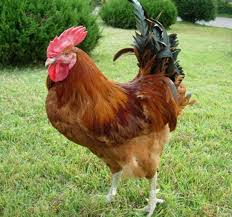
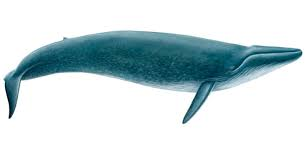

## 퀴즈2
### 야식 추천 모델A, B와 사용자 X,Y의 내용을 보고  precision@5, recall@5 구해보세요.  

1. 사용자X의 선호 야식: 치킨, 피자, 햄버거, 족발, 회, 돈까스, 샐러드, 만두, 라면, 김밥  
2. 사용자Y의 선호 야식: 치킨, 피자, 햄버거, 족발, 삼겹살, 떡볶이, 탕수육, 땅콩, 빵, 국수  
  
  
  
3. 야식 추천 모델 A: 치킨, 피자, 고구마, 타코야끼, 회  
4. 야식 추천 모델 B: 햄버거, 족발, 삼겹살, 떡볶이, 땅콩  

***

***

***

***

***

***

***

***

***

***

***

***

***

***

***

***

***

***

***

***

***

***

## 퀴즈1 해설
**먼저 아래 해설은 주관적인 의견이므로 절대적인 것이 아닙니다. 생각을 깊게 해보고 의견 나눴으면 좋겠습니다.**  
- FP(False Positive, precision 연관): 닭이 맞는데 닭이 아니라고 한다.(닭을 보여줬더니 고래라고 한다.)    
- FN(False Negative, recall 연관): 닭이 아닌데 닭이 맞다고 한다.(고래를 자꾸 닭이라고 한다.)  

0. 일단 두 가지 지표 모두 중요하다.  
1. 하지만 FN의 경우 고래를 닭이라고 착각하는 경우는 특징이 너무 다른 두 객체를 모델의 성능을 떠나서 설계에서부터 잘못됐다고 생각됨. 그리고 고래를 닭이라고 하는 **헛소리**에 대해 평가를 하는 것이 옳은지 의문이 드는 시점...    
2. FP의 경우를 보면 분류 모델은 결국 **맞게 분류하는 능력**이 중요하다. 마치 '일단 최대한 닭이랑 비슷하면 일단 닭이라고 분류하는 것이 중요하다' 라고 생각한다.  

##  퀴즈2 해설
### 야식 추천 모델A  
X: precision@5: 3/5  
Y: precision@5: 2/5  
X: recall@5: 3/10  
Y: recall@5: 2/10  

**모델 A의 precision@5: (3/5 + 2/5) / 2 = 0.5**  
**모델 A의 recall@5: (3/10 + 2/10) / 2 = 0.25**  

### 야식 추천 모델B
X: precision@5: 2/5  
Y: precision@5: 5/5  
X: recall@5: 2/10  
Y: recall@5: 5/10  

**모델B의 precision@5: (2/5 + 5/5) / 2 = 0.7**  
**모델B의 recall@5: (2/10 + 5/10) / 2 = 0.35**  